# Принятие решений в бизнесе

### Описание проекта

**Контекст и цели/задачи**

Мы — аналитики крупного интернет-магазина. Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.
Приоритизируем гипотезы, "запустим" A/B-тест и проанализируем результаты. 


**Часть 1. Приоритизация гипотез.**  
  
В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.  
Задача:  
Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.  
Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.  
Укажим, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясним, почему так произошло.
  
**Часть 2. Анализ A/B-теста**  
  
Мы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.  
  
Проанализируем A/B-тест:  
- Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.  
- Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения.  
- Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.  
- Построим график кумулятивного среднего количества заказов на посетителя по группам. Сделаем выводы и предположения.  
- Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделаем выводы и предположения.  
- Постройте точечный график количества заказов по пользователям. Сделаем выводы и предположения.  
- Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.  
- Построим точечный график стоимостей заказов. Сделаем выводы и предположения.  
- Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.  
- Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделаем выводы и предположения.  
- Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения.  
- Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделаем выводы и предположения.  
- Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения.  
- Примем решение по результатам теста и объясним его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.


**Описание данных**

Данные для первой части  
  
Файл /datasets/hypothesis.csv  
Hypothesis — краткое описание гипотезы;  
Reach — охват пользователей по 10-балльной шкале;  
Impact — влияние на пользователей по 10-балльной шкале;  
Confidence — уверенность в гипотезе по 10-балльной шкале;  
Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.  
  
Данные для второй части  
  
Файл /datasets/orders.csv.  
transactionId — идентификатор заказа;  
visitorId — идентификатор пользователя, совершившего заказ;  
date — дата, когда был совершён заказ;  
revenue — выручка заказа;  
group — группа A/B-теста, в которую попал заказ. 
  
Файл /datasets/visitors.csv  
date — дата;  
group — группа A/B-теста;  
visitors — количество пользователей в указанную дату в указанной группе A/B-теста

## Часть 1. Приоритизация гипотез.

**Загрузим библиотеки и исходные данные**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


In [2]:
hypothesis = pd.read_csv('/Users/dmitrynikolaev/Documents/datasets/hypothesis.csv')
orders = pd.read_csv('/Users/dmitrynikolaev/Documents/datasets/orders.csv')
visitors = pd.read_csv('/Users/dmitrynikolaev/Documents/datasets/visitors.csv')

Выведем таблицу с 9 гипотезами по увеличению выручки интернет-магазина с указанными параметрами по шкале от 1 до 10:  
Reach — скольких пользователей затронет изменение, которое вы хотите внести;  
Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;  
Confidence — насколько мы уверены, что это изменение повлияет на пользователей именно так;  
Efforts — сколько стоит протестировать эту гипотезу. 

In [3]:
pd.options.display.max_colwidth=1 # увеличим ширину столбцов
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


### Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [4]:
hypothesis['ICE']=round(hypothesis['Impact']*hypothesis['Confidence']/hypothesis['Efforts'],2)
hypothesis[['Hypothesis','ICE']].sort_values('ICE',ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


### Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [5]:
hypothesis['RICE']=round(hypothesis['Reach']*hypothesis['Impact']*hypothesis['Confidence']/hypothesis['Efforts'],2)
hypothesis[['Hypothesis','RICE']].sort_values('RICE',ascending=False)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


### Укажим, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясним, почему так произошло.

При применении фреймворка ICE, то есть с учётом  влияния на пользователей,  уверенности, что это изменение повлияет на пользователей именно так, и цены тестирования этой гипотезы, в приоритете гипотезы:  
- Запустить акцию, дающую скидку на товар в день рождения	 
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей	
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
  
При применении фреймворка RICE, то есть также с учётом количества пользователей, которых затронет изменение, приоритет гипотез выглядит следующим образом:  
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок  
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа  
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей  
- Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию  
  
Как раз за счёт того, что первые две гипотезы имеют высокую оценку охвата - 10 и 8 соответственно.  
При этом первая гипотеза имеет рейтинг 112, что в два раза выше второй (56) за счёт высоких остальных параметров, 3я и 4ая гипотезы с одинаковым рейтингом (40), немного меньше 2ой гипотезы.

## Часть 2. Анализ A/B-теста

**Исходные данные**

После проведения A/B-теста мы получили результаты, которые описаны в датасетах orders и visitors

In [6]:
orders.info()
orders

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [7]:
orders.duplicated().sum()

0

In [8]:
orders.rename(columns = {'transactionId':'transaction_id', 'visitorId':'visitor_id'}, inplace = True)

В таблице с заказами 5 столбцов, мы сразу переименовали их в привычный вид, 1197 записей, пропусков и дубликатов нет

In [9]:
visitors.info()
visitors

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


В таблице с посетителями 3 столбца, 62 записи, пропусков и дубликатов нет

Приведём тип данных в столбцах с датами в соответствующий и проверим, совпадают ли даты в таблицах с заказами и пользователями

In [10]:
orders['date']=pd.to_datetime(orders['date'])
visitors['date']=pd.to_datetime(visitors['date'])

print('Даты заказов:', orders['date'].min(), orders['date'].max())
print('Даты посещений:', visitors['date'].min(), visitors['date'].max())

Даты заказов: 2019-08-01 00:00:00 2019-08-31 00:00:00
Даты посещений: 2019-08-01 00:00:00 2019-08-31 00:00:00


Имеем данные за август 2019ого года с 1ого по 31ое

Посмотрим разделение заказов и посетителей по группам и проверим, есть ли и сколько посетителей, которые попали в обе группы

In [11]:
print(orders.groupby('group').agg({'transaction_id':'count'}))
print()
print(visitors.groupby('group').agg({'visitors':'sum'}))

       transaction_id
group                
A      557           
B      640           

       visitors
group          
A      18736   
B      18916   


In [12]:
len(orders.loc[orders['visitor_id'].isin(orders[orders['group']=='A']['visitor_id']) & \
    orders['visitor_id'].isin(orders[orders['group']=='B']['visitor_id']),'visitor_id'].unique())

58

Выборки для тестов практически равны, но 58 посетителей всё же попали в обе группы, что может немного исказить результат

### График кумулятивной выручки по группам

In [13]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

Соберём агрегированные кумулятивные по дням данные о заказах в несколько действий. 
Получим строки таблицы orders, дата которых меньше или равна дате элемента из datesGroups, а группа теста равна группе из datesGroups. Агрегируем значения. Вычислим максимальную дату. Для группы тоже рассчитаем максимум, и хотя она будет определённой, сделаем это, чтобы столбец 'group' не пропал из итогового вывода. Найдём число уникальных ID заказов и пользователей. Подсчитаем сумму средних чеков. Применим методы к каждой строке датафрейма и отсортируем результаты по столбцам 'date' и 'group':

In [14]:
ordersAggregated = ( datesGroups
    .apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
    .agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1)
    .sort_values(by=['date','group']) )

# аналогично для таблицы с посещениями
visitorsAggregated = ( datesGroups
    .apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
    .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)
    .sort_values(by=['date','group']) )

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(8) 

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
5,2019-08-03,B,61,59,380996,1803
6,2019-08-04,A,84,77,425699,2562
7,2019-08-04,B,78,75,489567,2573


Построим графики кумулятивной выручки по дням и группам A/B-тестирования: 

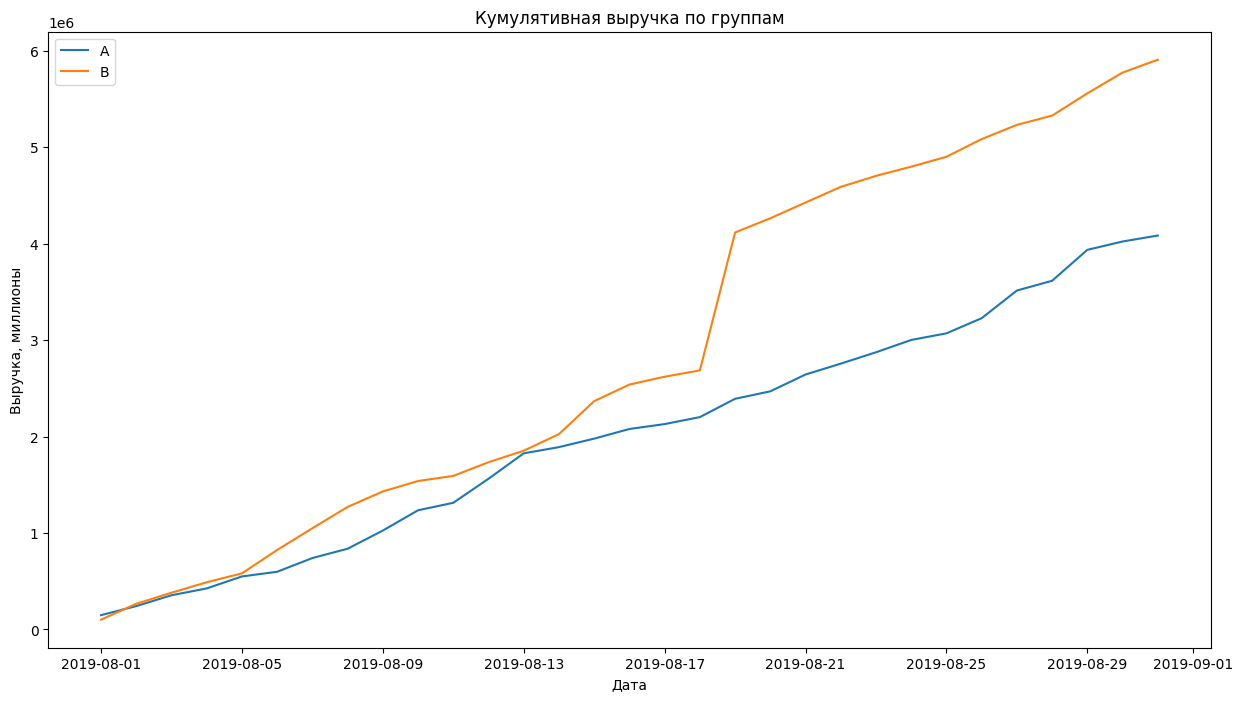

In [15]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(15,8))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A') # график выручки группы A
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B') # график выручки группы B
plt.title('Кумулятивная выручка по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка, миллионы')
plt.legend()
plt.show()

Из графика видим, что кумулятивная по дням выручка группы В во всём временном интервале стабильно увеличивается и больше группы А, а начиная с 18-19 числа значительно выше, больше чем на миллион, это может сигнализировать о всплеске числа заказов, либо о появлении очень дорогих заказов в выборке. Выводы о результате теста пока сделать не можем

### График кумулятивного среднего чека по группам

Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:

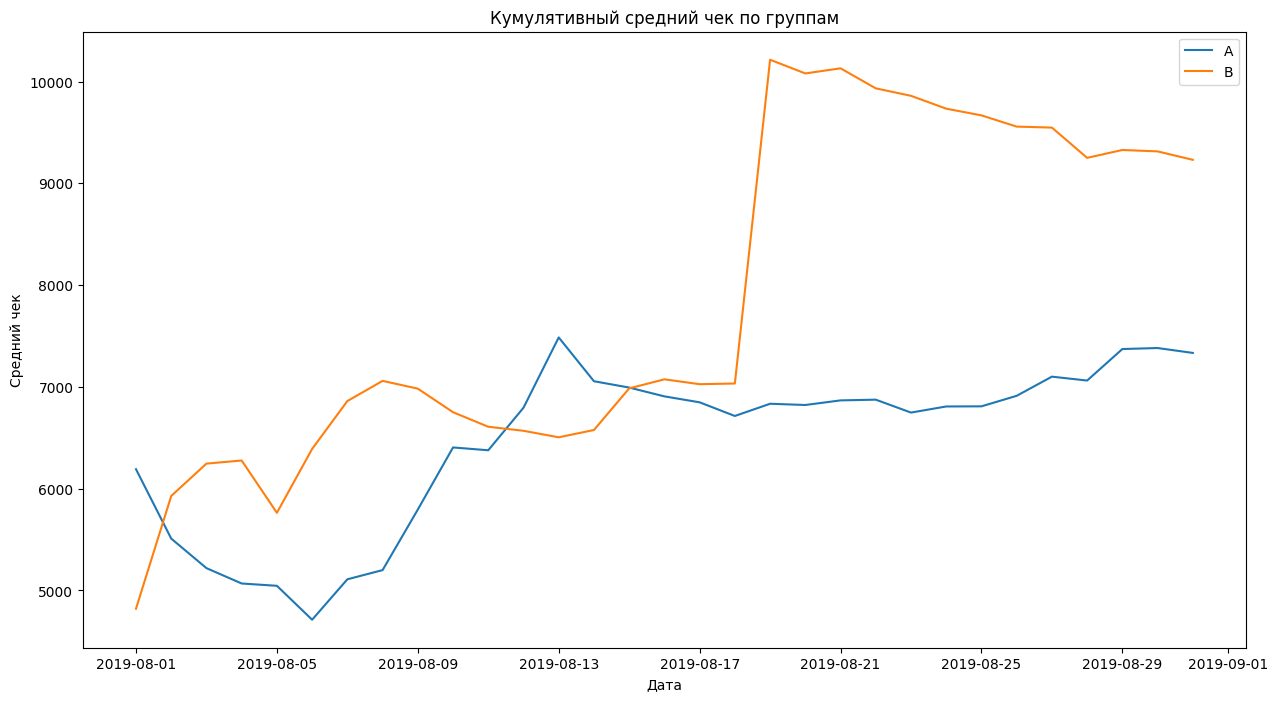

In [16]:
plt.figure(figsize=(15,8))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('Кумулятивный средний чек по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.legend()
plt.show()

Средний чек тоже становится равномерным ближе к концу теста: установился для группы A и продолжает падать для группы B. Возможно, в группу B в середине теста попали крупные заказы (резкий всплеск на графике). Тогда ей нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

### График относительного изменения кумулятивного среднего чека группы B к группе A

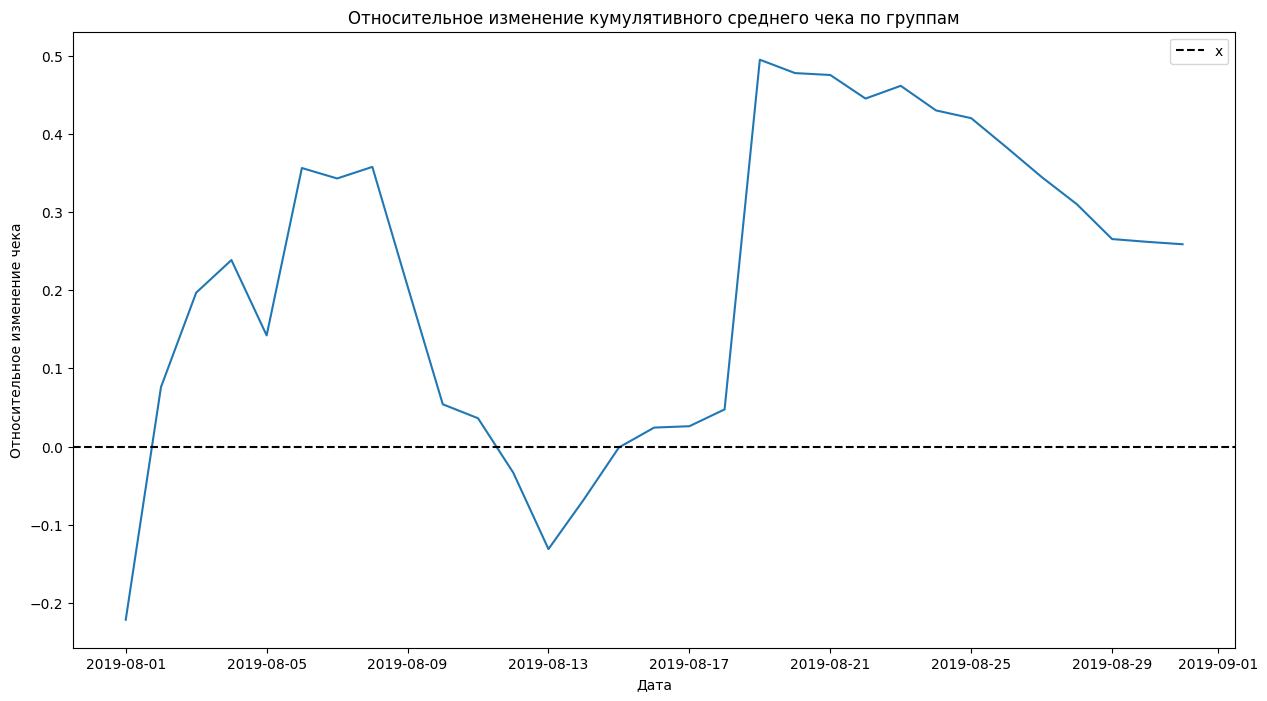

In [17]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA \
    .merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15,8))

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/ \
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
   
plt.title('Относительное изменение кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение чека')
plt.axhline(y=0, color='black', label='x', linestyle='--') # добавляем ось X
plt.legend()
plt.show()

График относительного изменения повторяет график самого среднего чека.  
В нескольких точках график различия между сегментами резко скачет. Где-то точно есть крупные заказы и выбросы.

### График кумулятивного среднего количества заказов на посетителя по группам

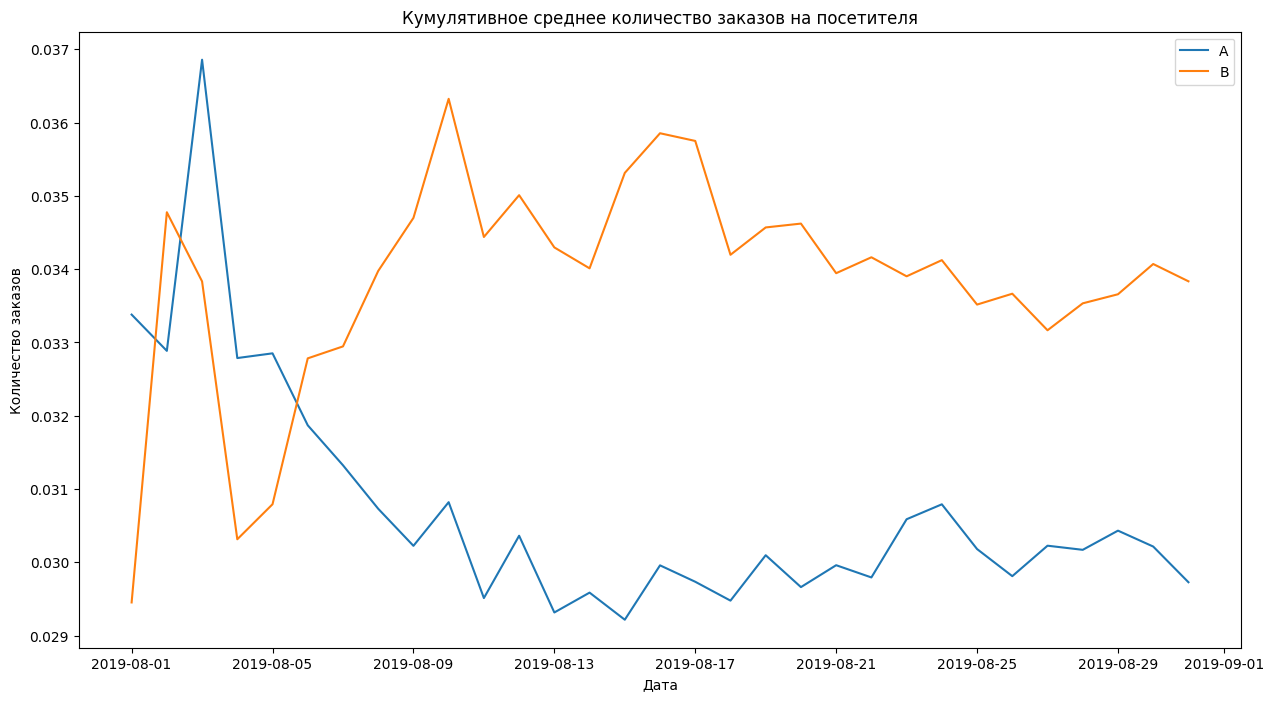

In [18]:
# считаем среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A'] # данные по группе A
cumulativeDataB = cumulativeData[cumulativeData['group']=='B'] # данные по группе B

plt.figure(figsize=(15,8))

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.title('Кумулятивное среднее количество заказов на посетителя')
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.legend()
plt.show()

В первые несколько дней среднее количество заказов на посетителя в группе А было выше группы В, но затем картина поменялась на протиповоложную и графики обеих групп стабилизировались.

### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

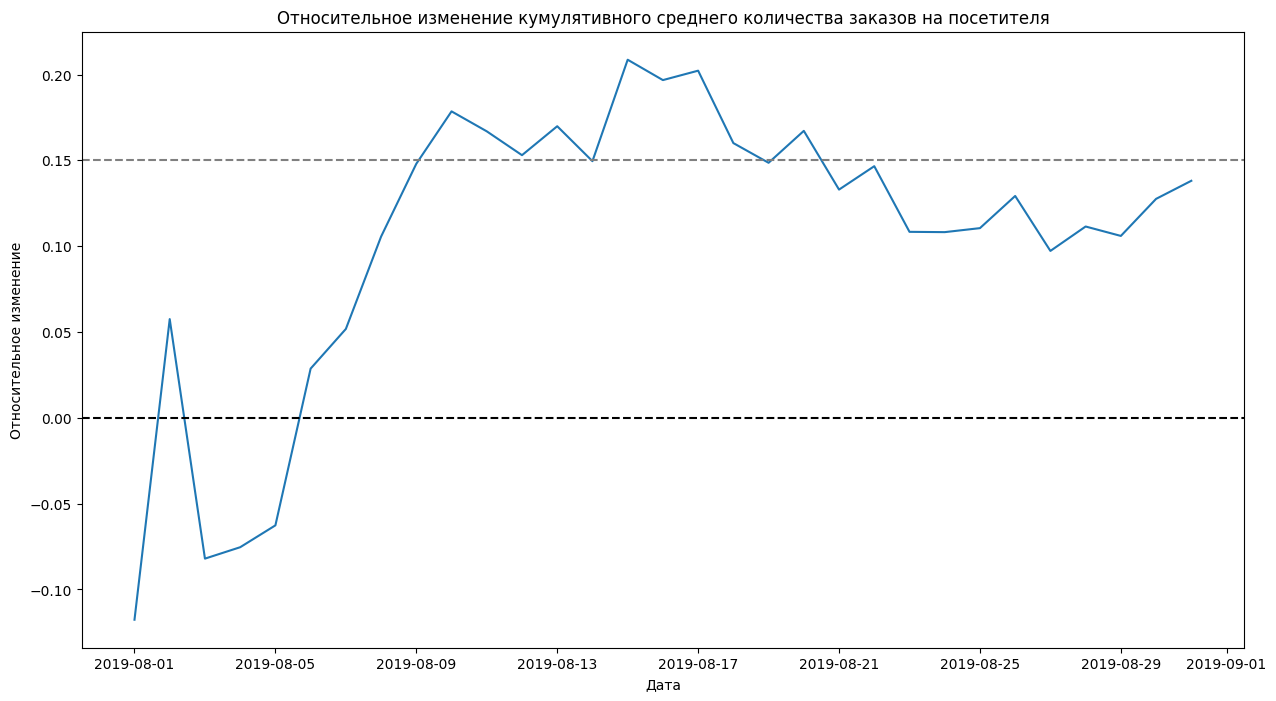

In [19]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']] \
    .merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15,8))

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)

plt.title('Относительное изменение кумулятивного среднего количества заказов на посетителя')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.show()

Относительное изменение кумулятивного среднего количества заказов на посетителя группы В c 6ого дня начало стабильно расти, а с 10ого дня стабилизировалась на уровне 15% выше относительного изменения группы А. В целом отношение среднего количества заказов на посетителя ещё не установилось, и пока делать выводы по тесту рано, сперва стоит проанализировать аномалии, они могут изменить картину.

### Точечный график количества заказов по пользователям

Подсчитаем количество заказов по пользователям и посмотрим на результат

In [20]:
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'}) )

ordersByUsers.columns = ['visitor_id', 'orders']

ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,visitor_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


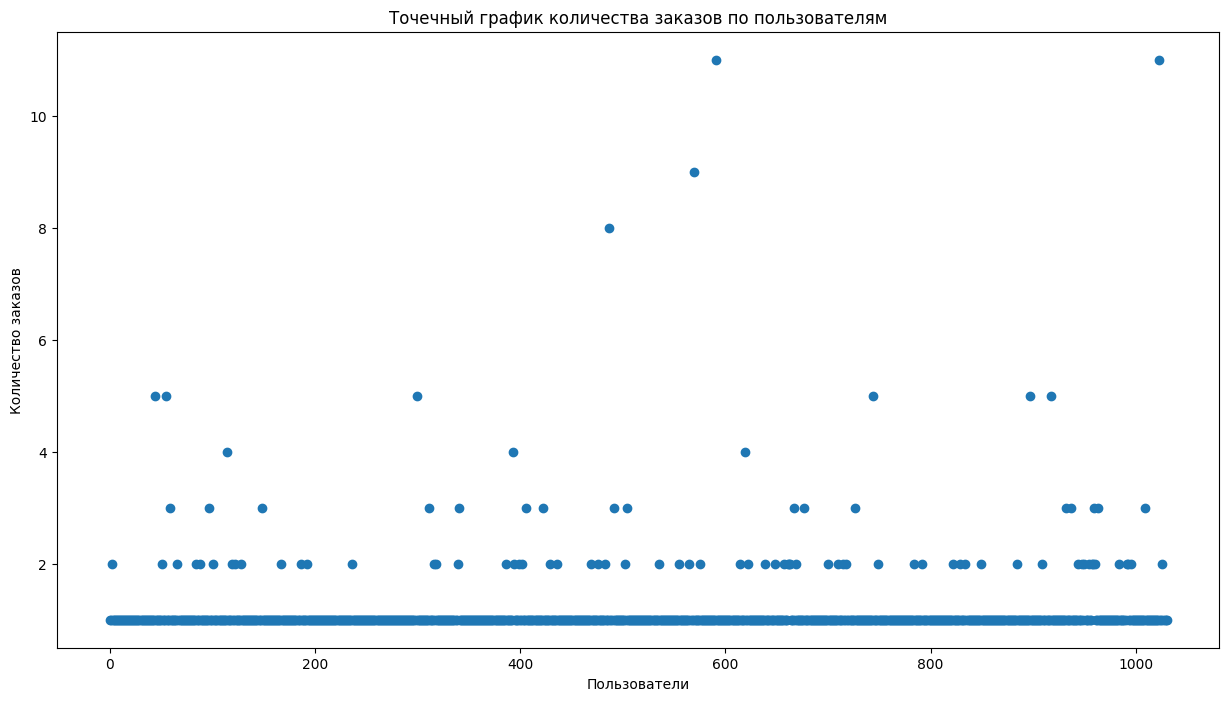

In [21]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(15,8))

plt.scatter(x_values, ordersByUsers['orders'])

plt.title('Точечный график количества заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')
plt.show()

По таблице и графику видим, что в основном пользователи делали 1 заказ, некоторые 2, ещё меньше 3, также есть несколько пользователей с 4 и 5 заказами, и 4 пользователя с 8, 9 и 11 заказами.

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей

In [22]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


Исходя из посчитанных перцентилей, можем утвержать, что более 2х заказов сделало 5% пользователей, а более 4х - 1%. За границу для опредедения аномальных пользователей выберем 3 и более заказа

### Точечный график стоимостей заказов

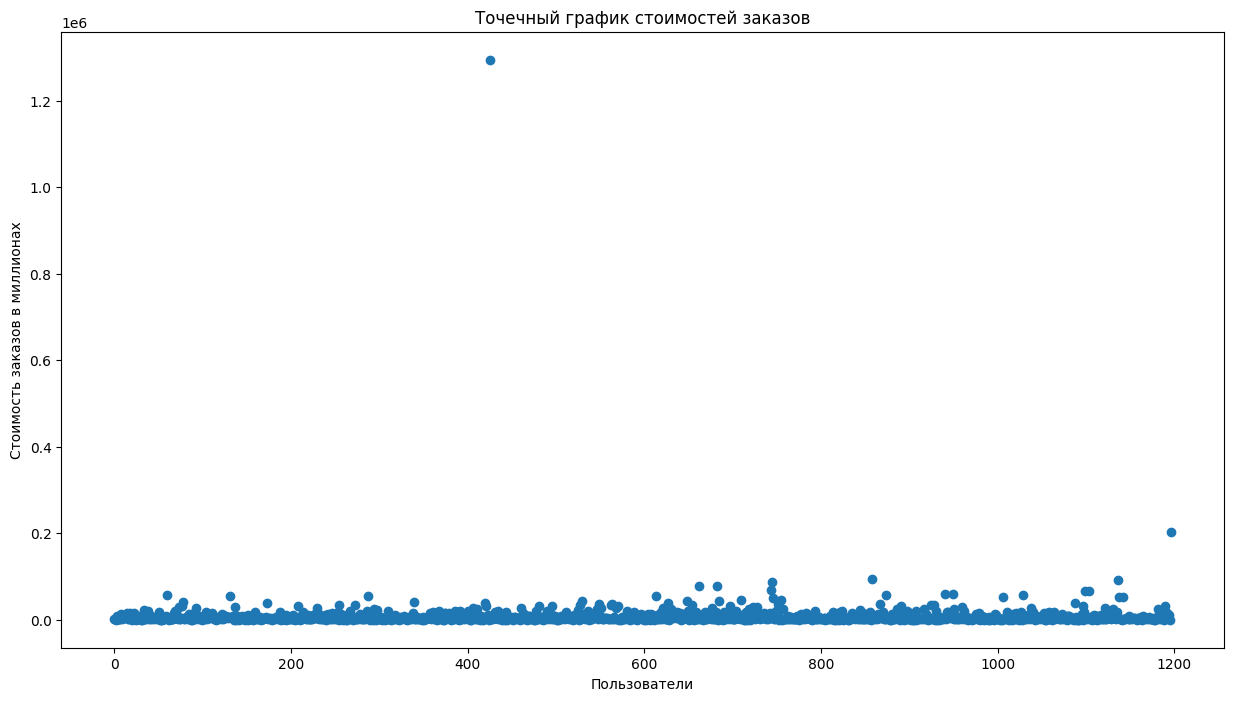

In [23]:
x_values = pd.Series(range(0,len(orders['revenue'])))

plt.figure(figsize=(15,8))

plt.scatter(x_values, orders['revenue'])

plt.title('Точечный график стоимостей заказов')
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказов в миллионах')
plt.show()

По графику видим один аномально дорогой заказ, который все точки остальных заказов "скучивает" около нуля.  
Построим такой же график с ограничением по оси Y до 210 тысяч

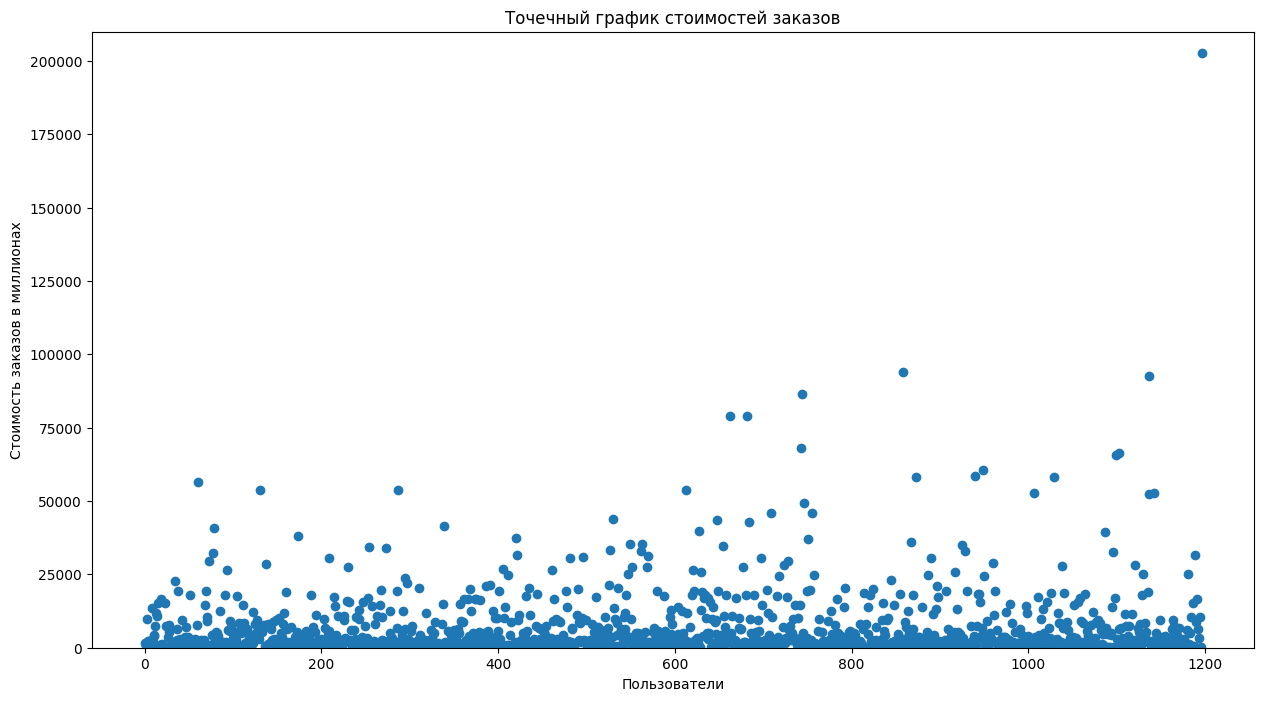

In [24]:
plt.figure(figsize=(15,8))

plt.scatter(x_values, orders['revenue'])

plt.title('Точечный график стоимостей заказов')
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказов в миллионах')
plt.ylim(0,210000)
plt.show()

Видим, что в основном заказы стоимостью до 20 тысяч, есть также небольшая часть от 25 до 60 тысяч, единичные заказы до 100 тысяч и два заказа на 200 тысяч и 1.2 млн

### Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

In [25]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


Исходя из посчитанных перцентилей, видим, что заказов ценой более 28 тысяч сделало 5% пользователей, а более 58 тысяч - 1%. За границу для опредедения аномальных заказов выберем 28 тысяч

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

**Начнём с подготовки данных**: таблицы с посетителями и кумулятивном количеством посетителей с разбивкой по группам. Потом аналогично с количеством заказов

In [26]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'} ),
    axis=1 )
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'} ),
    axis=1 )
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']



ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'visitor_id': pd.Series.nunique, 'revenue': 'sum'}) )
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'} ),
    axis=1, ).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA','revenueCummulativeA']

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'visitor_id': pd.Series.nunique, 'revenue': 'sum'}) )
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'} ),
    axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date','ordersCummulativeB','revenueCummulativeB']

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5)) 

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01  20              148579           20               
1 2019-08-02  19              93822            23               
2 2019-08-03  24              112473           16               
3 2019-08-04  15              70825            16               
4 2019-08-05  25              124218           23               

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0  101217           20                  148579                
1  165531           39                  242401                
2  114248           63                  354874                
3  108571           78                  425699                
4  92428            103                 549917                

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0  20                  101217               719                
1  43                  266748               619                
2  59                  380996         

Напомним названия столбцов данных:  
date — дата;  
ordersPerDateA — количество заказов в выбранную дату в группе A;  
revenuePerDateA — суммарная выручка в выбранную дату в группе A;  
ordersPerDateB — количество заказов в выбранную дату в группе B;  
revenuePerDateB — суммарная выручка в выбранную дату в группе B;  
ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;  
revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;  
ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;  
revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;  
visitorsPerDateA — количество пользователей в выбранную дату в группе A;  
visitorsPerDateB — количество пользователей в выбранную дату в группе B;  
visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A;  
visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B. 
  
  
Посчитаем статистическую значимость различия в среднем количестве заказов между группами.
Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['visitor_id', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [27]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique}) )
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique}) )
ordersByUsersB.columns = ['visitor_id', 'orders']

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

In [28]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - \
        len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - \
        len(ordersByUsersB['orders'])), name='orders')],axis=0)

Подготовку данных завершили, перейдём к расчётам статистической значимости.  

Проверим, есть ли статистическая значимость различий в среднем количестве заказов на посетителя, и какой относительный прирост среднем количестве заказов на посетителя в группе В с помощью непараметрического критерия Манна-Уитни.  
Сформулируем гипотезы. Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть. Уровень статистической значимости возьмём 0.05.  
Применим критерий и отформатируем p-value

In [29]:
print('Значение p-value '"{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

if stats.mannwhitneyu(sampleA, sampleB)[1] < 0.05 :
    print ('Отвергаем нулевую гипотезу')
else: print ('Не получилось отвергнуть нулевую гипотезу')

print('Относительный прирост группы В '"{:.1%}".format(sampleB.mean() / sampleA.mean() - 1))

Значение p-value 0.017
Отвергаем нулевую гипотезу
Относительный прирост группы В 13.8%


Нулевую гипотезу о том, что различий в среднем количестве заказов между группами нет, отвергаем, то есть придерживаемся альтернативной гипотезы о наличии различий. Относительный прирост в среднем количестве заказов на посетителя в группе В 13.8%.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

Теперь проверим статистическую значимость различий в среднем чеке между сегментами.  
Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть.  
Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию mannwhitneyu() данные о выручке с заказов.  
А ещё найдём относительные различия в среднем чеке между группами:

In [30]:
pvalue_mean_check = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], \
            orders[orders['group']=='B']['revenue'])[1]
print('Значение p-value ''{0:.3f}'.format(pvalue_mean_check))
if pvalue_mean_check < 0.05 :
    print ('Отвергаем нулевую гипотезу')
else: print ('Не получилось отвергнуть нулевую гипотезу')

print('Относительный прирост группы В '\
 '{:.1%}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

Значение p-value 0.729
Не получилось отвергнуть нулевую гипотезу
Относительный прирост группы В 25.9%


Нулевую гипотезу о том, что различий в среднем чеке между группами нет, не отвергаем.  
Относительный прирост среднем чеке в группе В 25.9%.  
Явно видим сильное влияние тех самых аномальных заказов

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

**Начнём с подготовки данных**:  
Сделаем срезы пользователей с числом заказов 3 и более — usersWithManyOrders и пользователей, совершивших заказы дороже 28 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers. 

In [31]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > int(np.percentile(ordersByUsers['orders'], [95]))]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > int(np.percentile(ordersByUsers['orders'], [95]))]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > int(np.percentile(orders['revenue'], [95]))]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print()
print('Аномальных пользователей всего',abnormalUsers.shape[0])

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitor_id, dtype: int64

Аномальных пользователей всего 74


/var/folders/qm/npnmpfw50z7_yqn218qvz3m40000gn/T/ipykernel_15679/2532949712.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ordersByUsersA[ordersByUsersA['orders'] > int(np.percentile(ordersByUsers['orders'], [95]))]['visitor_id'],
/var/folders/qm/npnmpfw50z7_yqn218qvz3m40000gn/T/ipykernel_15679/2532949712.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ordersByUsersB[ordersByUsersB['orders'] > int(np.percentile(ordersByUsers['orders'], [95]))]['visitor_id'],
/var/folders/qm/npnmpfw50z7_yqn218qvz3m40000gn/T/ipykernel_15679/2532949712.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will

Аномальных пользователей достаточно много, но это позволить более точно провести тест.  
Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным.  
Сформулируем гипотезы. Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть. Уровень статистической значимости возьмём 0.05.  
  
Сначала подготовим выборки количества заказов по пользователям по группам теста, затем применим статистический критерий Манна-Уитни к полученным выборкам:

In [32]:
sampleAFiltered = pd.concat(
    [ ordersByUsersA[ np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))]['orders'],
        pd.Series( 0, index=np.arange(
         data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders']) ), name='orders' ) ], axis=0 )

sampleBFiltered = pd.concat(
    [ ordersByUsersB[ np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))]['orders'],
        pd.Series(0,index=np.arange(
         data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders']) ), name='orders' ) ], axis=0 )

In [33]:
print('Значение p-value ''{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

if stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1] < 0.05 :
    print ('Отвергаем нулевую гипотезу')
else: print ('Не получилось отвергнуть нулевую гипотезу')

print('Относительный прирост группы В '\
 '{:.1%}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

Значение p-value 0.013
Отвергаем нулевую гипотезу
Относительный прирост группы В 17.3%


Нулевую гипотезу о том, что различий в среднем количестве заказов между группами нет, отвергаем, то есть придерживаемся альтернативной гипотезы о наличии различий. Относительный прирост в среднем количестве заказов на посетителя в группе В 17.3%.  
То есть по сравнению с "сырыми" данными только прирост получился на 3.5% выше

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [34]:
pvalue_mean_check_filtered = stats.mannwhitneyu( orders[ np.logical_and(orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)) )]['revenue'],
            orders[ np.logical_and(orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)) )]['revenue'] )[1]

print('Значение p-value ''{0:.3f}'.format(pvalue_mean_check_filtered))

if pvalue_mean_check_filtered < 0.05 :
    print ('Отвергаем нулевую гипотезу')
else: print ('Не получилось отвергнуть нулевую гипотезу')

print('Относительный прирост группы В ''{:.1%}'.format(
        orders[ np.logical_and( orders['group'] == 'B', np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            ) ]['revenue'].mean()
        / orders[ np.logical_and( orders['group'] == 'A', np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            ) ]['revenue'].mean() - 1 ) )

Значение p-value 0.738
Не получилось отвергнуть нулевую гипотезу
Относительный прирост группы В -2.0%


Нулевую гипотезу о том, что различий в среднем чеке между группами нет, не отвергаем, так же, как и по "сырым" данным. А вот относительный прирост в среднем чеке в группе В получился -2%, то есть прирост оказался у группы А

### Примем решение по результатам теста и объясним его

По итогам анализа результатов A/B теста получили, что (с учётом корректировки на аномальные заказы) количество заказов увеличилось, на 17.3%, а вот средний чек нет, даже немного уменьшился, на 2%. Принимаем решение остановить тест и зафиксировать победу группы В на основании значительно увеличившегося количества заказов, а значит и итоговой прибыли интернет-магазина.

## Общий вывод по проекту

В данном проекте сначала по имеющимся исходным данным с параметрами Reach, Impact, Confidence и Efforts мы **выбрали наиболее перспективную гипотезу** из девяти. По фреймворку ICE ей оказалась гипотеза «Запустить акцию, дающую скидку на товар в день рождения», затем, чтобы учесть охват, мы применили фреймворк RICE, по нему гипотезой в приоритете стала «Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок», поскольку у неё как раз самый высокий охват.  
  
Зачем, получив результаты проведения A/B-теста в виде двух таблиц с заказами и посетителями, мы проанализировали их, предварительно проверив корректность - отсутствие пропусков и дубликатов, а также типы данных и названия столбцов, приведя их к корректному виду. Также проверили, что совпадают даты - с 1ого по 31ое августа 2019ого года, что разделение заказов и посетителей по группам получилось приверно равным, и пользователей, которые попали в обе группы, - их оказалось 58.  
  
**Далее мы приступили к анализу самого теста:**  
В начале по графикам кумулятивного среднего количество заказов на посетителя и его относительного изменения увидели, что первые несколько дней среднее количество заказов в группе А было выше группы В, но затем картина поменялась на протиповоложную и графики обеих групп стабилизировались. Относительное изменение кумулятивного среднего количества заказов на посетителя группы В c 6ого дня начало стабильно расти, а с 10ого дня стабилизировалась на уровне 15% выше относительного изменения группы А.  
По графикам кумулятивных выручки и среднего чека убедились в их стабильном росте, но обнаружили аномально дорогие заказы, которые могли исказить результат. По точечным графикам количества заказов и их стоимостей, а также посчитанным 95м и 99м процентилям, мы выявили и обозначили аномальные заказы - по количеству 3 и более, а по цене больше 28 тысяч.  
(отметим, что в основном пользователи делали 1 заказ, некоторые 2, ещё меньше от 3х до 11. Касаемо стоимости - в основном заказы были до 20 тысяч, есть также небольшая часть от 25 до 60 тысяч, единичные заказы до 100 тысяч и два заказа на 200 тысяч и 1.2 млн.)  
  
**Потом посчитали статистическую значимость различий в среднем количестве заказов и среднем чеке для сравнения как по сырым данным, так и по очищенным:**  
- по количеству заказов: нулевую гипотезу о том, что различий в среднем количестве заказов между группами нет, отвергли, то есть придерживаемся альтернативной гипотезы о наличии различий. Относительный прирост в среднем количестве заказов на посетителя в группе В 17.3%. По сравнению с "сырыми" данными только прирост получился на 3.5% выше.  
- по среднему чеку: нулевую гипотезу о том, что различий в среднем чеке между группами нет, не отвергли, так же, как и по "сырым" данным. А вот относительный прирост в среднем чеке в группе В получился -2%, то есть прирост оказался у группы А, а по сырым данным прирост был у группы В в 25,9%, что явно было из-за тех самых аномальных заказов.  
  
**По итогу получили**, что количество заказов увеличилось, а вот средний чек нет, даже немного уменьшился. Приняли решение остановить тест и зафиксировать победу группы В на основании значительно увеличившегося количества заказов, а значит и итоговой прибыли интернет-магазина.